In [38]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle
import xrd
from importlib import reload
reload(xrd)

<module 'xrd' from '/Users/vekeryk/Projects/master-project-light/xrd.py'>

In [39]:
def load_dataset(filename="10_000.pkl"):
    """Load saved dataset"""
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    return data['X'], data['Y']

In [40]:
X_train, Y_train = load_dataset("datasets/dataset_1000_dl100_targeted.pkl")
print(X_train.shape)
print(Y_train.shape)

(1000, 7)
(1000, 701)


In [41]:
idx = np.argmax(Y_train[0])
idx

np.int64(20)

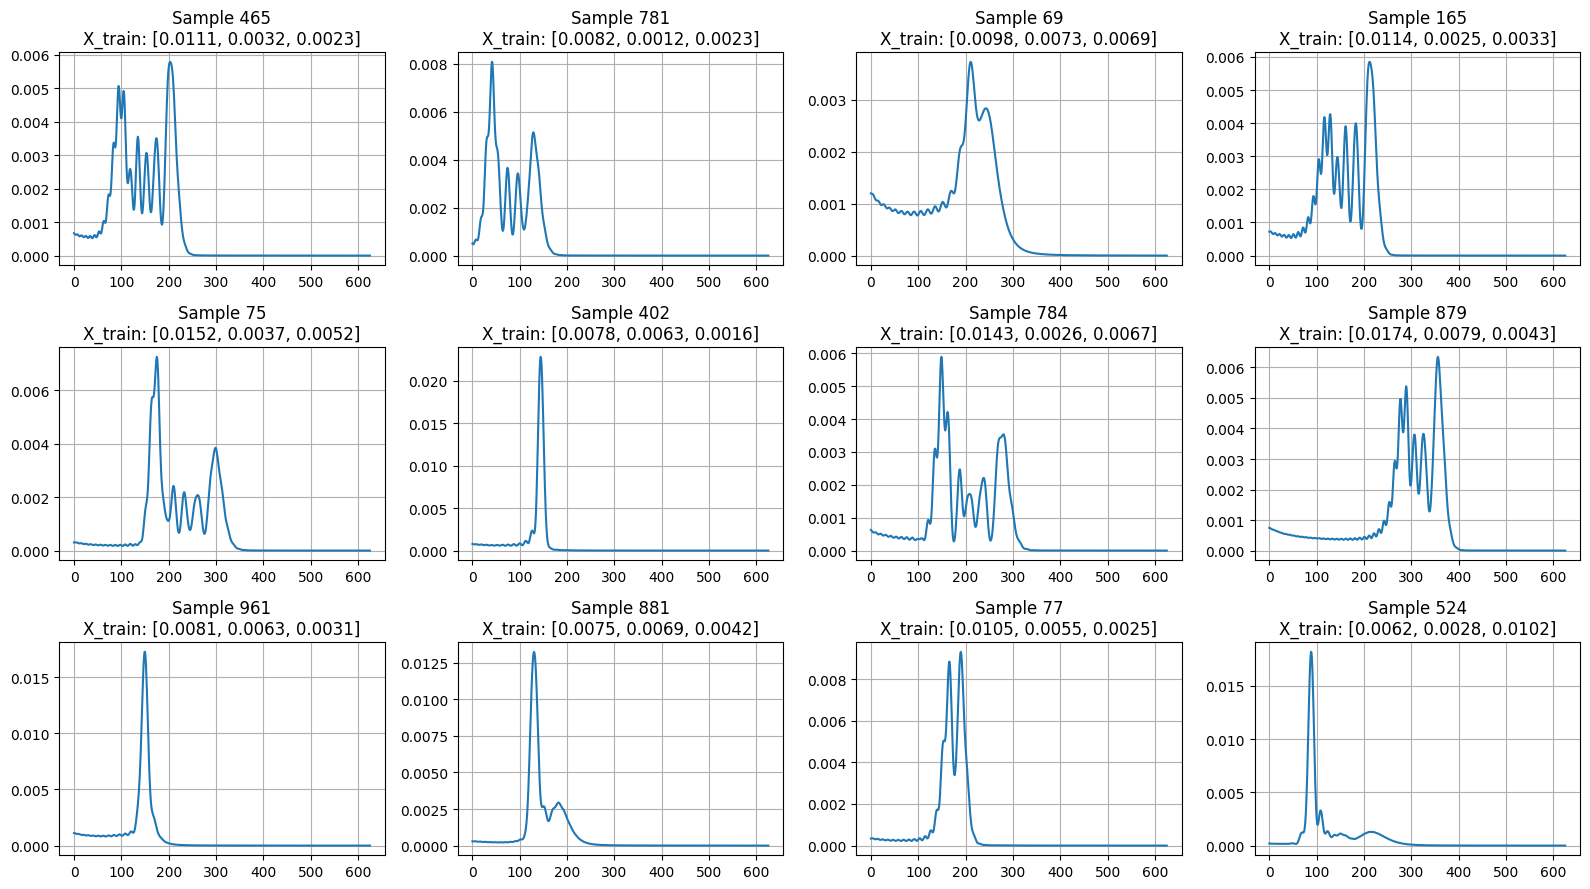

In [44]:
Y_train = Y_train[:, 40:]
size = Y_train.shape[1]
x = torch.linspace(0, size - 1, size)
rng = np.random.default_rng()
fig, axes = plt.subplots(3, 4, figsize=(16, 9))  # 3 rows, 4 columns

for i, ax in enumerate(axes.flat):
    rand_idx = np.random.randint(0, X_train.shape[0])
    ax.plot(x, Y_train[rand_idx], label=f"Curve {rand_idx}")
    # ax.set_yscale('log')
    x_vals = X_train[rand_idx]
    ax.set_title(f"Sample {rand_idx}\nX_train: [{x_vals[0]:.4f}, {x_vals[1]:.4f}, {x_vals[4]:.4f}]")
    ax.grid(True)

plt.tight_layout()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (666,) and (701,)

<Figure size 1200x600 with 0 Axes>

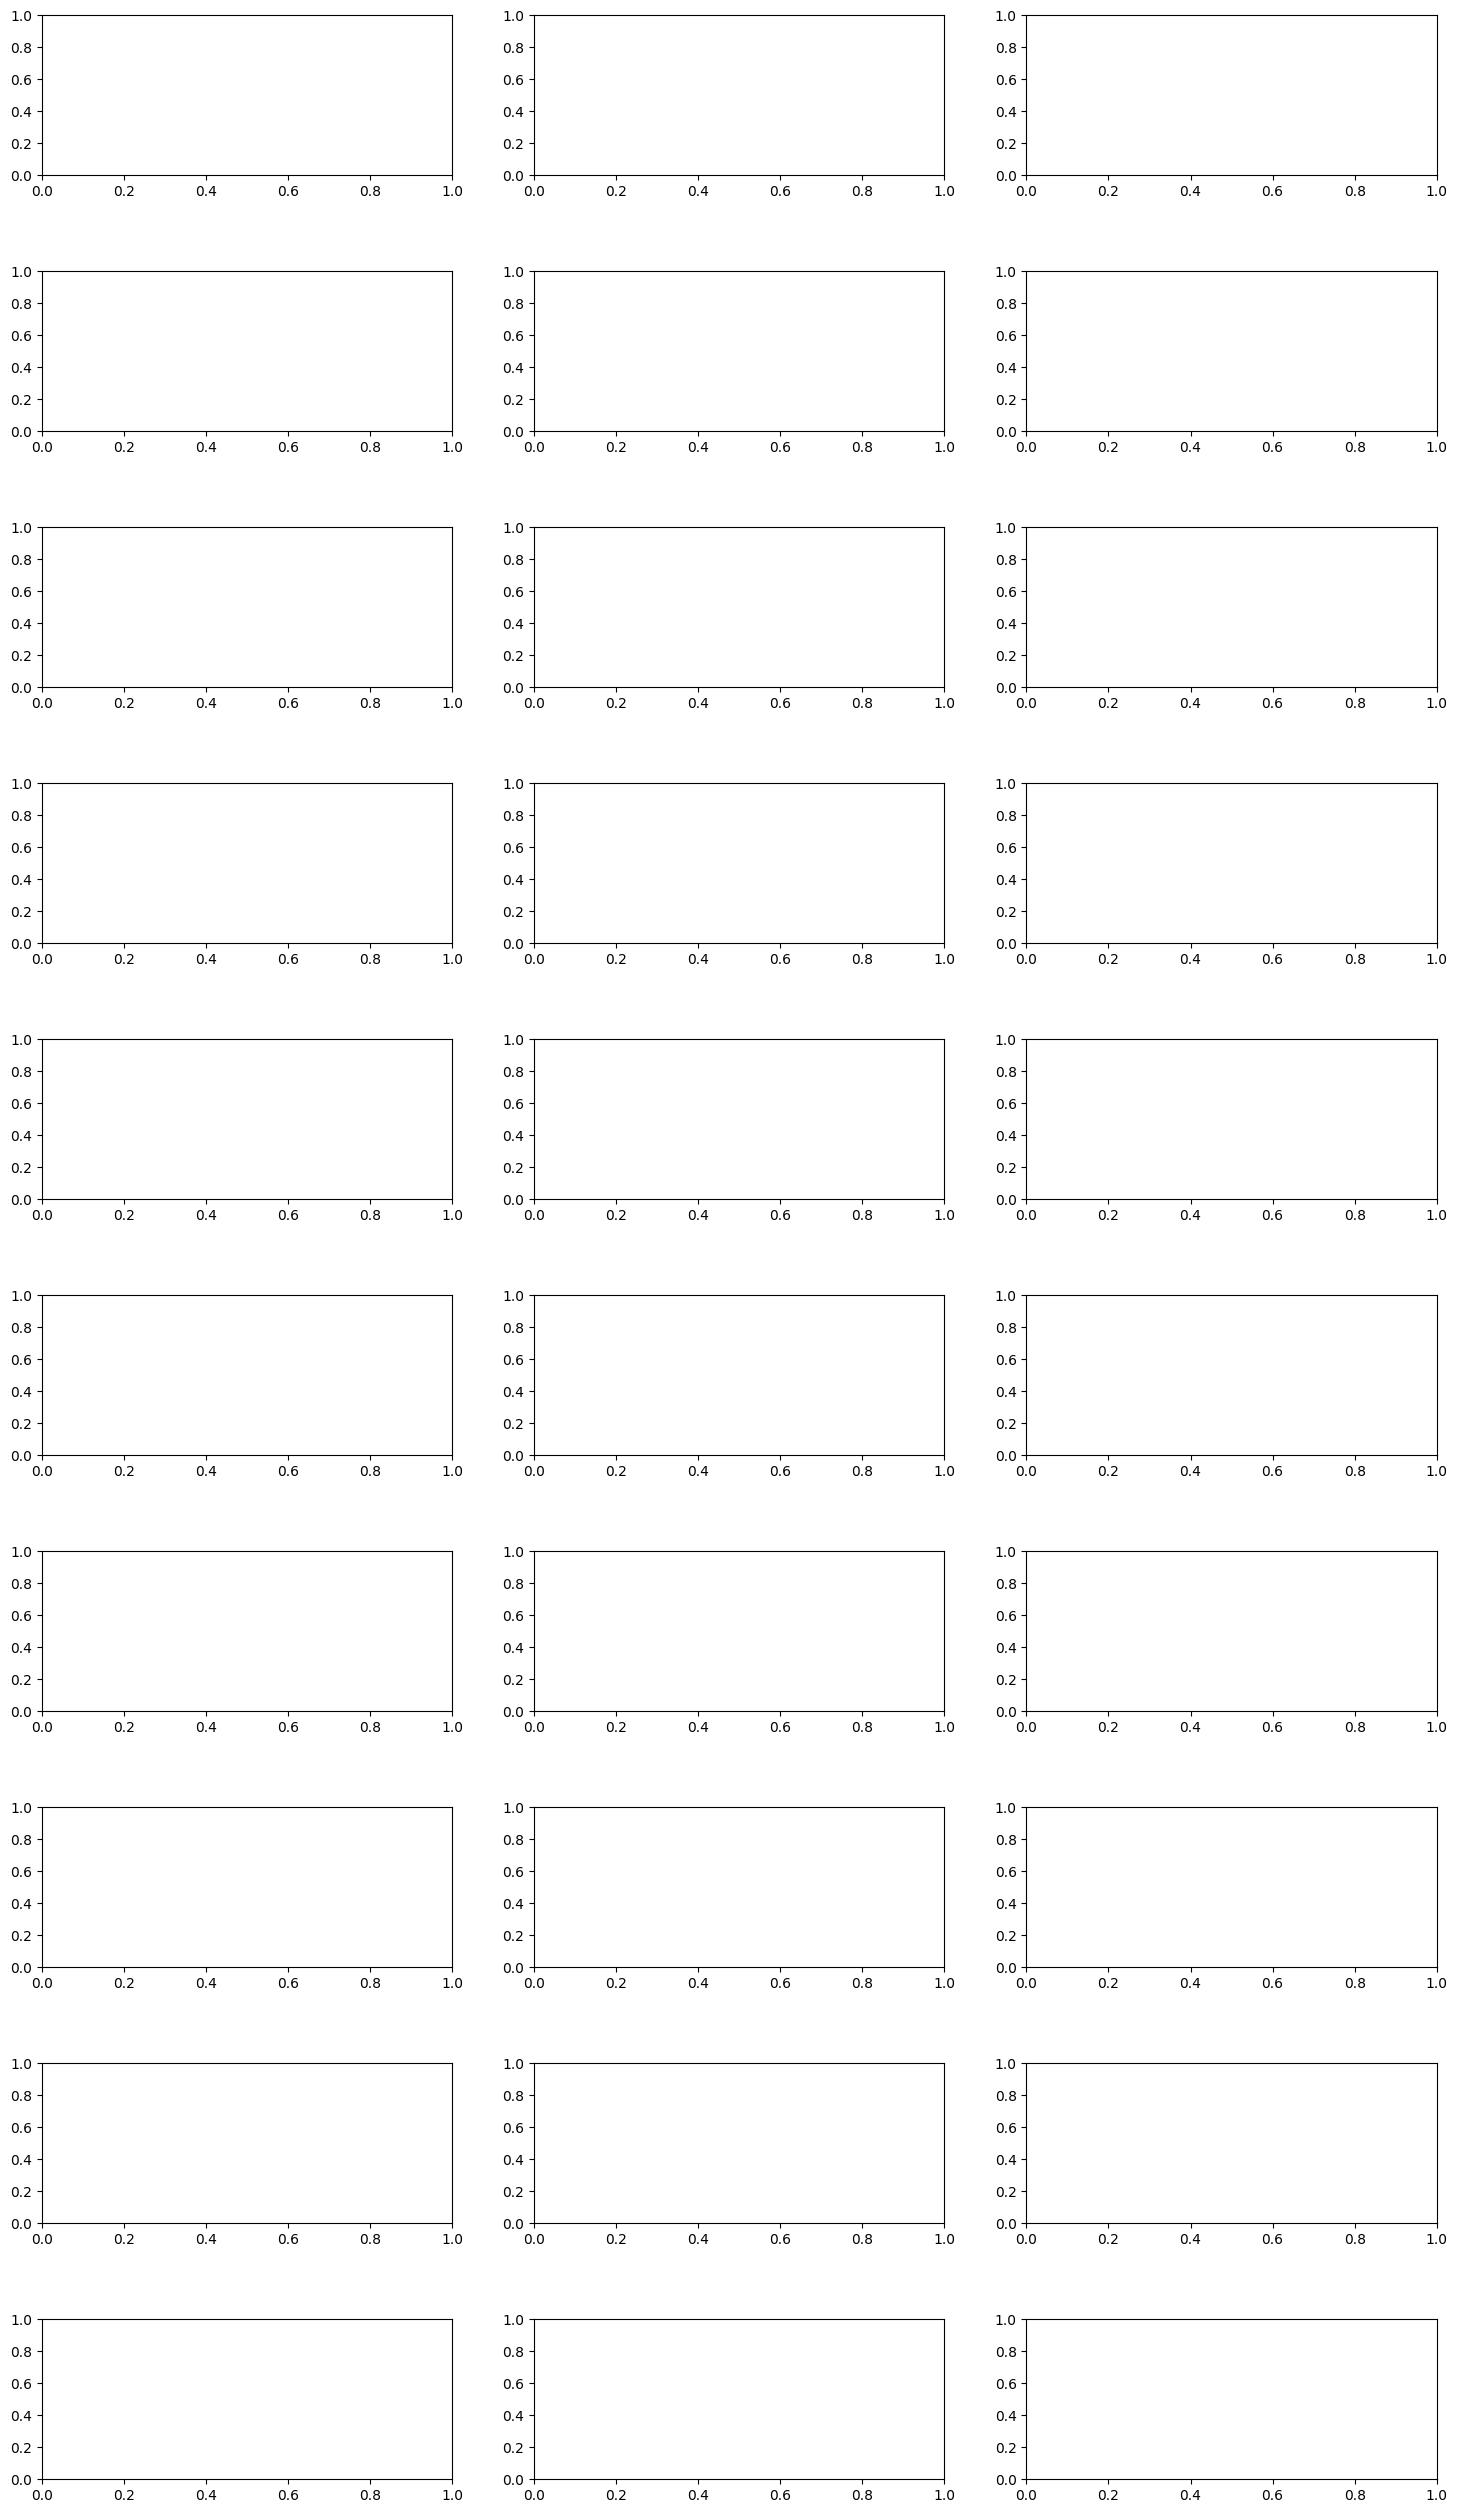

In [43]:
import helpers as h
import xrd
from importlib import reload
reload(xrd)
reload(h)

rng = np.random.default_rng()
indices = rng.choice(X_train.shape[0], size=10, replace=False)
x_long = torch.linspace(0, 1000 - 1, 1000)

plt.figure(figsize=(12, 6))

fig, axes = plt.subplots(len(indices), 3, figsize=(18, 32))
plt.subplots_adjust(hspace=0.6)  # add vertical space between rows


for i, idx in enumerate(indices):
    # print(X_train[idx])
    curve, profile = xrd.compute_curve_and_profile(array=X_train[idx])
    axes[i, 0].plot(x, curve.Y_R_vseZ, label=f"Curve {idx}")
    axes[i, 0].grid(True)
    axes[i, 0].set_yscale('log')
    axes[i, 0].legend()

    axes[i, 1].plot(curve.ML_X, curve.ML_Y, label=f"Curve {idx}")
    axes[i, 1].set_title(f"i={i} \n {h.fparam(arr=X_train[idx])}")
    axes[i, 1].grid(True)
    # axes[i, 0].set_yscale('log')
    axes[i, 1].legend()

    axes[i, 2].plot(profile.X, profile.total_Y, label="Total")
    axes[i, 2].plot(profile.X, profile.asymmetric_Y, label="Asymmetric")
    axes[i, 2].plot(profile.X, profile.decaying_Y, label="Decaying")
    axes[i, 2].grid(True)
    axes[i, 2].legend()

plt.title("10 Random Samples from X_train")
plt.xlabel("x")
plt.ylabel("Y_train")
plt.grid(True)
plt.legend()
plt.show()

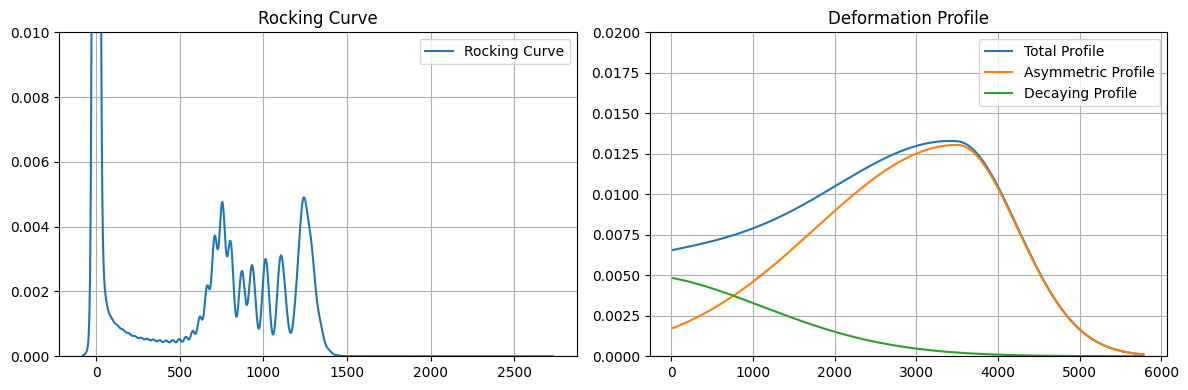

In [ ]:
# ПРИКЛАД ВИВЕДЕННЯ ОДНІЄЇ КРИВОЇ ТА ПРОФІЛЮ ДЕФОРМАЦІЇ
import xrd
from importlib import reload
reload(xrd)

params_obj = xrd.DeformationProfile(
    Dmax1=0.01305,
    D01=0.0017,
    L1=5800e-8,
    Rp1=3500e-8,
    D02=0.004845,
    L2=4000e-8,
    Rp2=-500e-8,
    Dmin=0.0001,
    dl=40e-8
)

curve, profile = xrd.compute_curve_and_profile(params_obj=params_obj)

fig, axes = plt.subplots(1, 2, figsize=(12, 4)) # 12 width, 4 height

axes[0].set_title("Rocking Curve")
axes[0].plot(curve.X_DeltaTeta, curve.Y_R_vseZ, label="Rocking Curve")
axes[0].set_ylim(0, 0.01)
axes[0].grid(True)
axes[0].legend()

axes[1].set_title("Deformation Profile")
axes[1].plot(profile.X, profile.total_Y, label="Total Profile")
axes[1].plot(profile.X, profile.asymmetric_Y, label="Asymmetric Profile")
axes[1].plot(profile.X, profile.decaying_Y, label="Decaying Profile")
axes[1].set_ylim(0, 0.02)
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# compare original params/normalized/denormalized
from train_from_file import NormalizedXRDDataset, denorm_params

ds_tr = NormalizedXRDDataset(X_train[[0, 0]], Y_train[[0, 0]], train=True)
print(ds_tr)
dl_tr = torch.utils.data.DataLoader(ds_tr, shuffle=True)
print(ds_tr)

for x, y in dl_tr:
    x, y = x.to('cpu'), y.to('cpu')
    print(x.shape, y.shape)

print(X_train[[0, 0]])
print(y)
denorm_params(y)

ModuleNotFoundError: No module named 'train_from_file'

True params: [0.011, 0.003, 2e-05, 1.55e-05, 0.026, 1e-05, -2.5e-05], Pred params: [0.010498, 0.002402, 2.065e-05, 1.503e-05, 0.024607, 1.102e-05, -4.015e-05]
True params: [0.011, 0.0055, 4e-05, 1.55e-05, 0.0235, 5e-06, -4e-05], Pred params: [0.011752, 0.004129, 4.212e-05, 1.293e-05, 0.02056, 6.504e-06, -3.801e-05]
True params: [0.026, 0.018, 4.5e-05, 4.05e-05, 0.0035, 3.5e-05, -3e-05], Pred params: [0.025867, 0.018654, 4.311e-05, 4.019e-05, 0.003411, 3.221e-05, -3.877e-05]
True params: [0.0185, 0.0155, 2.5e-05, 5e-07, 0.006, 2.5e-05, -4.5e-05], Pred params: [0.019345, 0.011502, 2.537e-05, 1.245e-06, 0.00375, 2.128e-05, -3.811e-05]
True params: [0.026, 0.013, 2.5e-05, 2.05e-05, 0.016, 1.5e-05, -6.5e-05], Pred params: [0.026224, 0.012458, 2.316e-05, 1.937e-05, 0.016698, 1.479e-05, -4.07e-05]
True params: [0.016, 0.003, 7e-05, 2.55e-05, 0.006, 5e-06, -5.5e-05], Pred params: [0.01575, 0.002993, 6.623e-05, 2.753e-05, 0.004655, 5.899e-06, -3.49e-05]
True params: [0.011, 0.0005, 7e-05, 2.05e

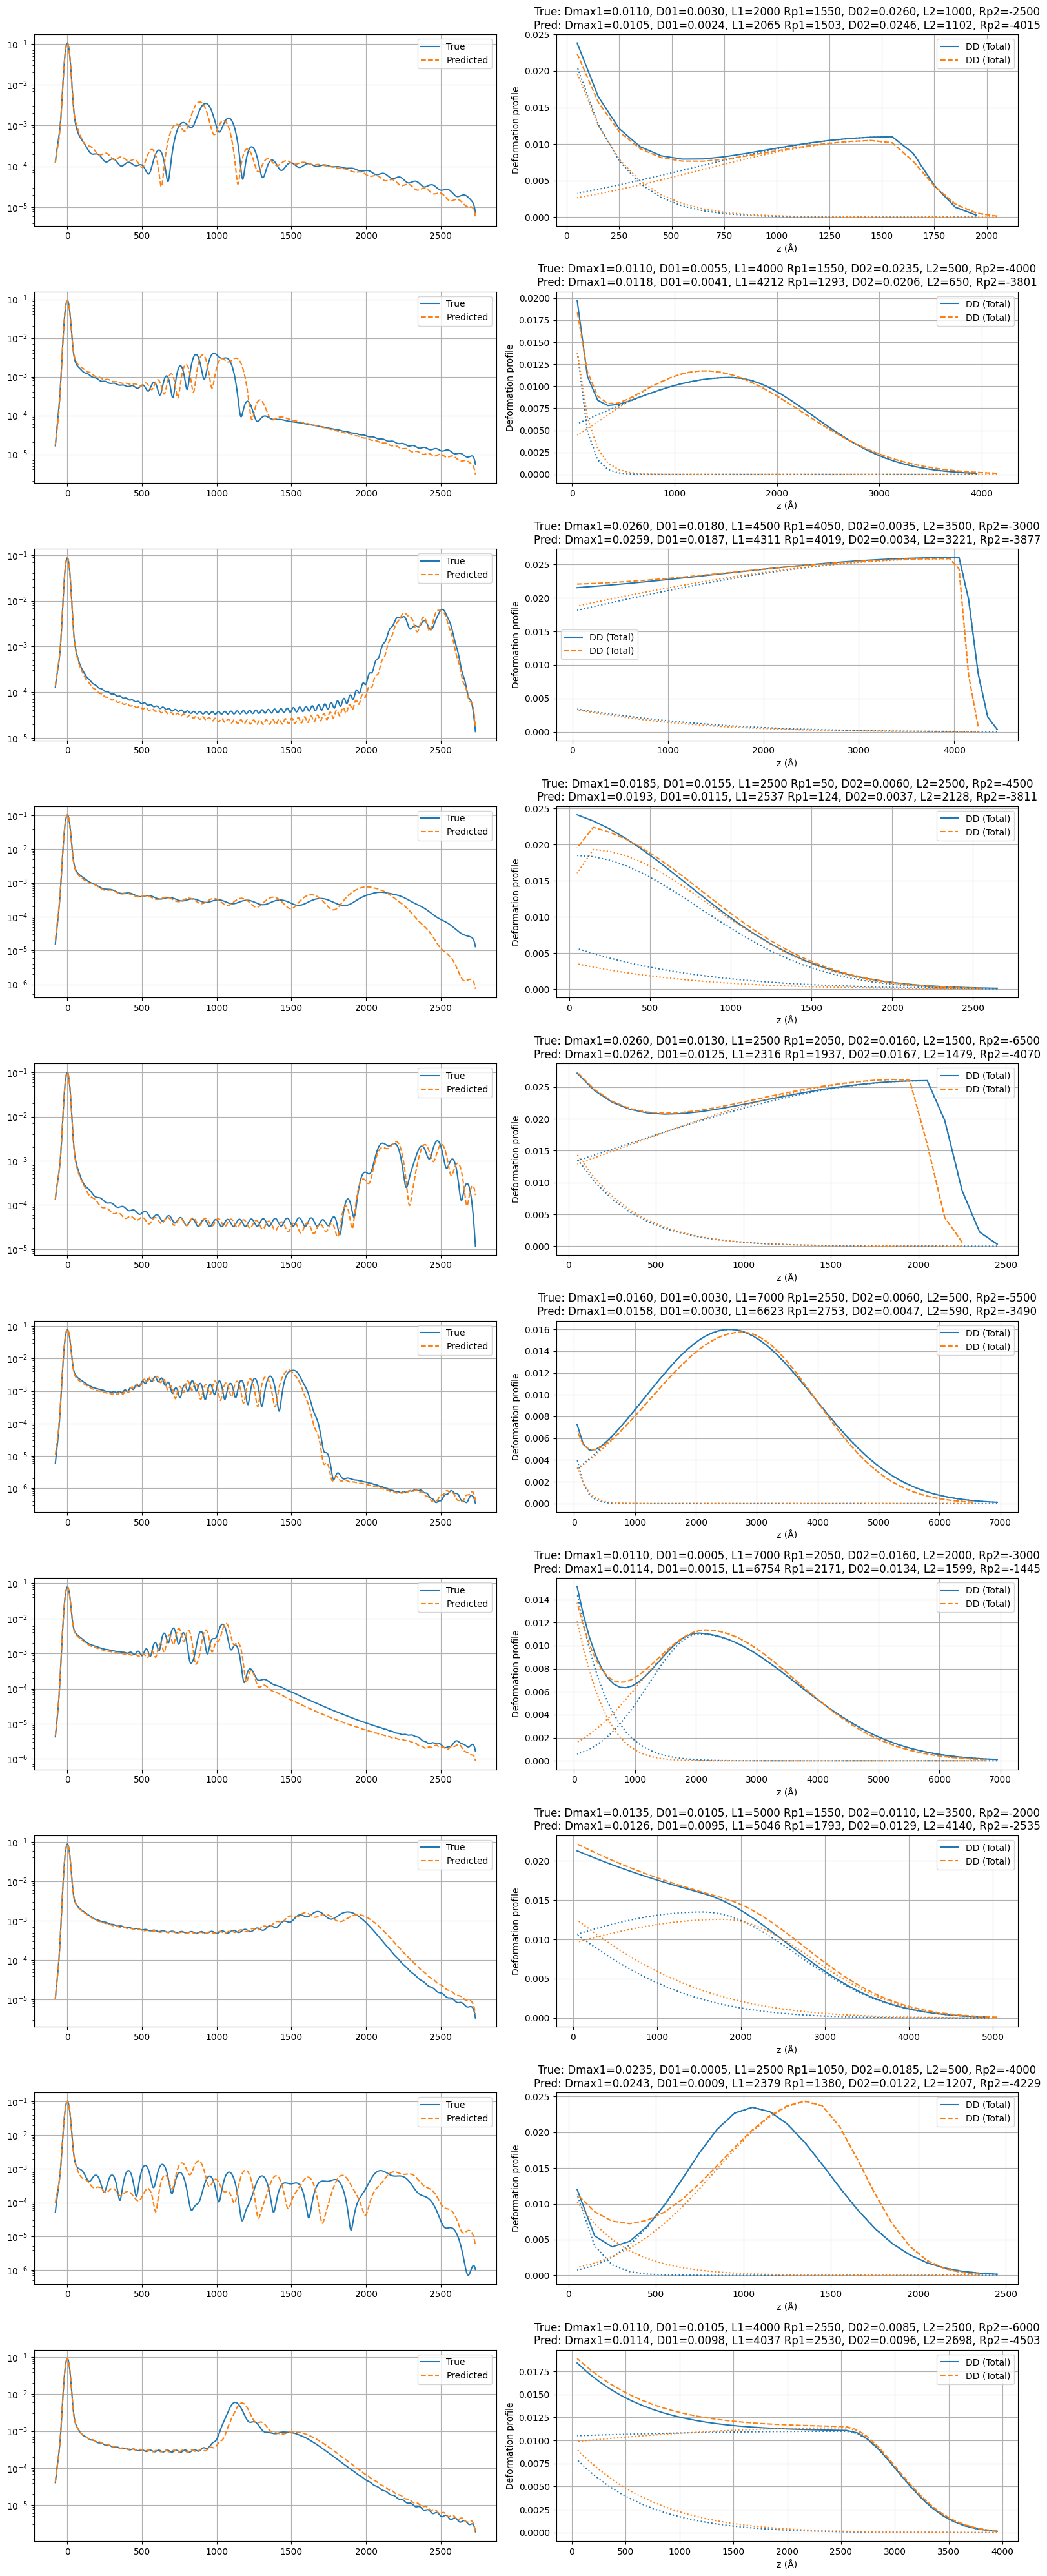

In [48]:
import matplotlib.pyplot as plt
import xrd
import helpers as h
from importlib import reload
reload(xrd)

# Examples after training (true vs predicted):
true_pred_pairs = [
  ([0.011000, 0.003000, 2.000e-05, 1.550e-05, 0.026000, 1.000e-05, -2.500e-05], [0.010498, 0.002402, 2.065e-05, 1.503e-05, 0.024607, 1.102e-05, -4.015e-05]),
  ([0.011000, 0.005500, 4.000e-05, 1.550e-05, 0.023500, 5.000e-06, -4.000e-05], [0.011752, 0.004129, 4.212e-05, 1.293e-05, 0.020560, 6.504e-06, -3.801e-05]),
  ([0.026000, 0.018000, 4.500e-05, 4.050e-05, 0.003500, 3.500e-05, -3.000e-05], [0.025867, 0.018654, 4.311e-05, 4.019e-05, 0.003411, 3.221e-05, -3.877e-05]),
  ([0.018500, 0.015500, 2.500e-05, 5.000e-07, 0.006000, 2.500e-05, -4.500e-05], [0.019345, 0.011502, 2.537e-05, 1.245e-06, 0.003750, 2.128e-05, -3.811e-05]),
  ([0.026000, 0.013000, 2.500e-05, 2.050e-05, 0.016000, 1.500e-05, -6.500e-05], [0.026224, 0.012458, 2.316e-05, 1.937e-05, 0.016698, 1.479e-05, -4.070e-05]),
  ([0.016000, 0.003000, 7.000e-05, 2.550e-05, 0.006000, 5.000e-06, -5.500e-05], [0.015750, 0.002993, 6.623e-05, 2.753e-05, 0.004655, 5.899e-06, -3.490e-05]),
  ([0.011000, 0.000500, 7.000e-05, 2.050e-05, 0.016000, 2.000e-05, -3.000e-05], [0.011350, 0.001471, 6.754e-05, 2.171e-05, 0.013388, 1.599e-05, -1.445e-05]),
  ([0.013500, 0.010500, 5.000e-05, 1.550e-05, 0.011000, 3.500e-05, -2.000e-05], [0.012566, 0.009521, 5.046e-05, 1.793e-05, 0.012903, 4.140e-05, -2.535e-05]),
  ([0.023500, 0.000500, 2.500e-05, 1.050e-05, 0.018500, 5.000e-06, -4.000e-05], [0.024340, 0.000865, 2.379e-05, 1.380e-05, 0.012211, 1.207e-05, -4.229e-05]),
  ([0.011000, 0.010500, 4.000e-05, 2.550e-05, 0.008500, 2.500e-05, -6.000e-05], [0.011372, 0.009839, 4.037e-05, 2.530e-05, 0.009611, 2.698e-05, -4.503e-05]),
]

def plot_profils(ax, profile, color, linestyle, pred=False):
    # L = dl * km
    # x_vals = [(L - dl * k + dl / 2) / 1e-8 for k in range(1, km + 1)]
    # ax.figure(figsize=(5, 3))
    ax.plot(profile.X, profile.total_Y, label='DD (Total)', color=color, linestyle=linestyle)
    # 'DDPL1 (Asymmetric Gaussian)'
    ax.plot(profile.X, profile.asymmetric_Y, label=None, linestyle=':', color=color)
    # 'DDPL2 (Decaying Gaussian)'
    ax.plot(profile.X, profile.decaying_Y, label=None, linestyle=':', color=color)
    ax.set_xlabel('z (Å)')
    ax.set_ylabel('Deformation profile')
    # ax.set_title('Deformation Profile Components')

fig, axes = plt.subplots(len(true_pred_pairs), 2, figsize=(16, len(true_pred_pairs) * 4))
plt.subplots_adjust(hspace=0.6)  # add vertical space between rows

for i, (true_params, pred_params) in enumerate(true_pred_pairs):
    print(f"True params: {true_params}, Pred params: {pred_params}")
    # add true_params to plot

    curve, profile_true = xrd.compute_curve_and_profile(array=true_params, dl=100e-8)
    
    axes[i, 0].plot(curve.X_DeltaTeta, curve.Y_R_vseZ, label="True")
    axes[i, 0].grid(True)
    # log
    axes[i, 0].set_yscale('log')
    # axes[i, 0].set_ylim(0, 0.02)

    plot_profils(axes[i, 1], profile_true, 'C0', '-')

    curve, profile_pred = xrd.compute_curve_and_profile(array=pred_params, dl=100e-8)

    plot_profils(axes[i, 1], profile_pred, 'C1', '--')
    axes[i, 0].plot(curve.X_DeltaTeta, curve.Y_R_vseZ, label="Predicted", linestyle='dashed')
    axes[i, 1].set_title(f"True: {h.fparam(arr=true_params)}\nPred: {h.fparam(arr=pred_params)}")
    axes[i, 1].grid(True)
    # axes[i, 1].set_ylim(0, 0.03)
    axes[i, 1].legend()
    axes[i, 0].legend()


plt.tight_layout()
plt.show()